This notebook computes the maximum value of the redshift factor at a given radius in the geometry. Feel free to use this code (**with attribution to Ref. [1]**) for your research or to produce visualizations for your next presentation! 

We will first modify the parameters for this run. In particular, we will just care about the first lensing band. 

In [1]:
!python ChangeParams.py --a=0.94 --i=17 --p_image=0 --limits=10 --dx0=0.02 --dx1=5 --dx2=5

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



In [2]:
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations
from matplotlib import colors
from scipy.interpolate import griddata

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject



Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



# Computation of the lensing bands

In [3]:
%time !python lensingbands.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  1000000
Number of points in the n=1 grid  16
Number of points in the n=2 grid  16
File  ./Results/LensingBands_a_0.94_i_17.h5  created.
CPU times: user 86.5 ms, sys: 41.6 ms, total: 128 ms
Wall time: 21.9 s


In [4]:
%time !python raytracing.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.94_i_17.h5  created.

A total of 1000032 photons were ray-traced
CPU times: user 53.8 ms, sys: 23.4 ms, total: 77.3 ms
Wall time: 11.8 s


In [5]:
%time !python gfactor.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the redshift factor at each point in the image plane 

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
CPU times: user 9.44 ms, sys: 7.83 ms, total: 17.3 ms
Wall time: 1.4 s


### Reading the output of the lensing bands calculation

In [6]:
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5


### Reading the output of the ray-tracing

In [7]:
fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]

h5f.close()

Reading file:  ./Results/Rays_a_0.94_i_17.h5


In [8]:
### Reading the output of the gfactor calculation

In [9]:
fnrays="./Results/gfactors_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

gs0=h5f['gs0'][:]

h5f.close()

Reading file:  ./Results/gfactors_a_0.94_i_17.h5


## Plotting the results and getting the points of the radius we are interested

We chose a radius of interest

In [10]:
radius=isco

We will use a normalization that goes from very red ($g=0$) to very blue ($g=1.5$), and it goes to white at $g=1$

In [11]:
divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=1., vmax=1.5)

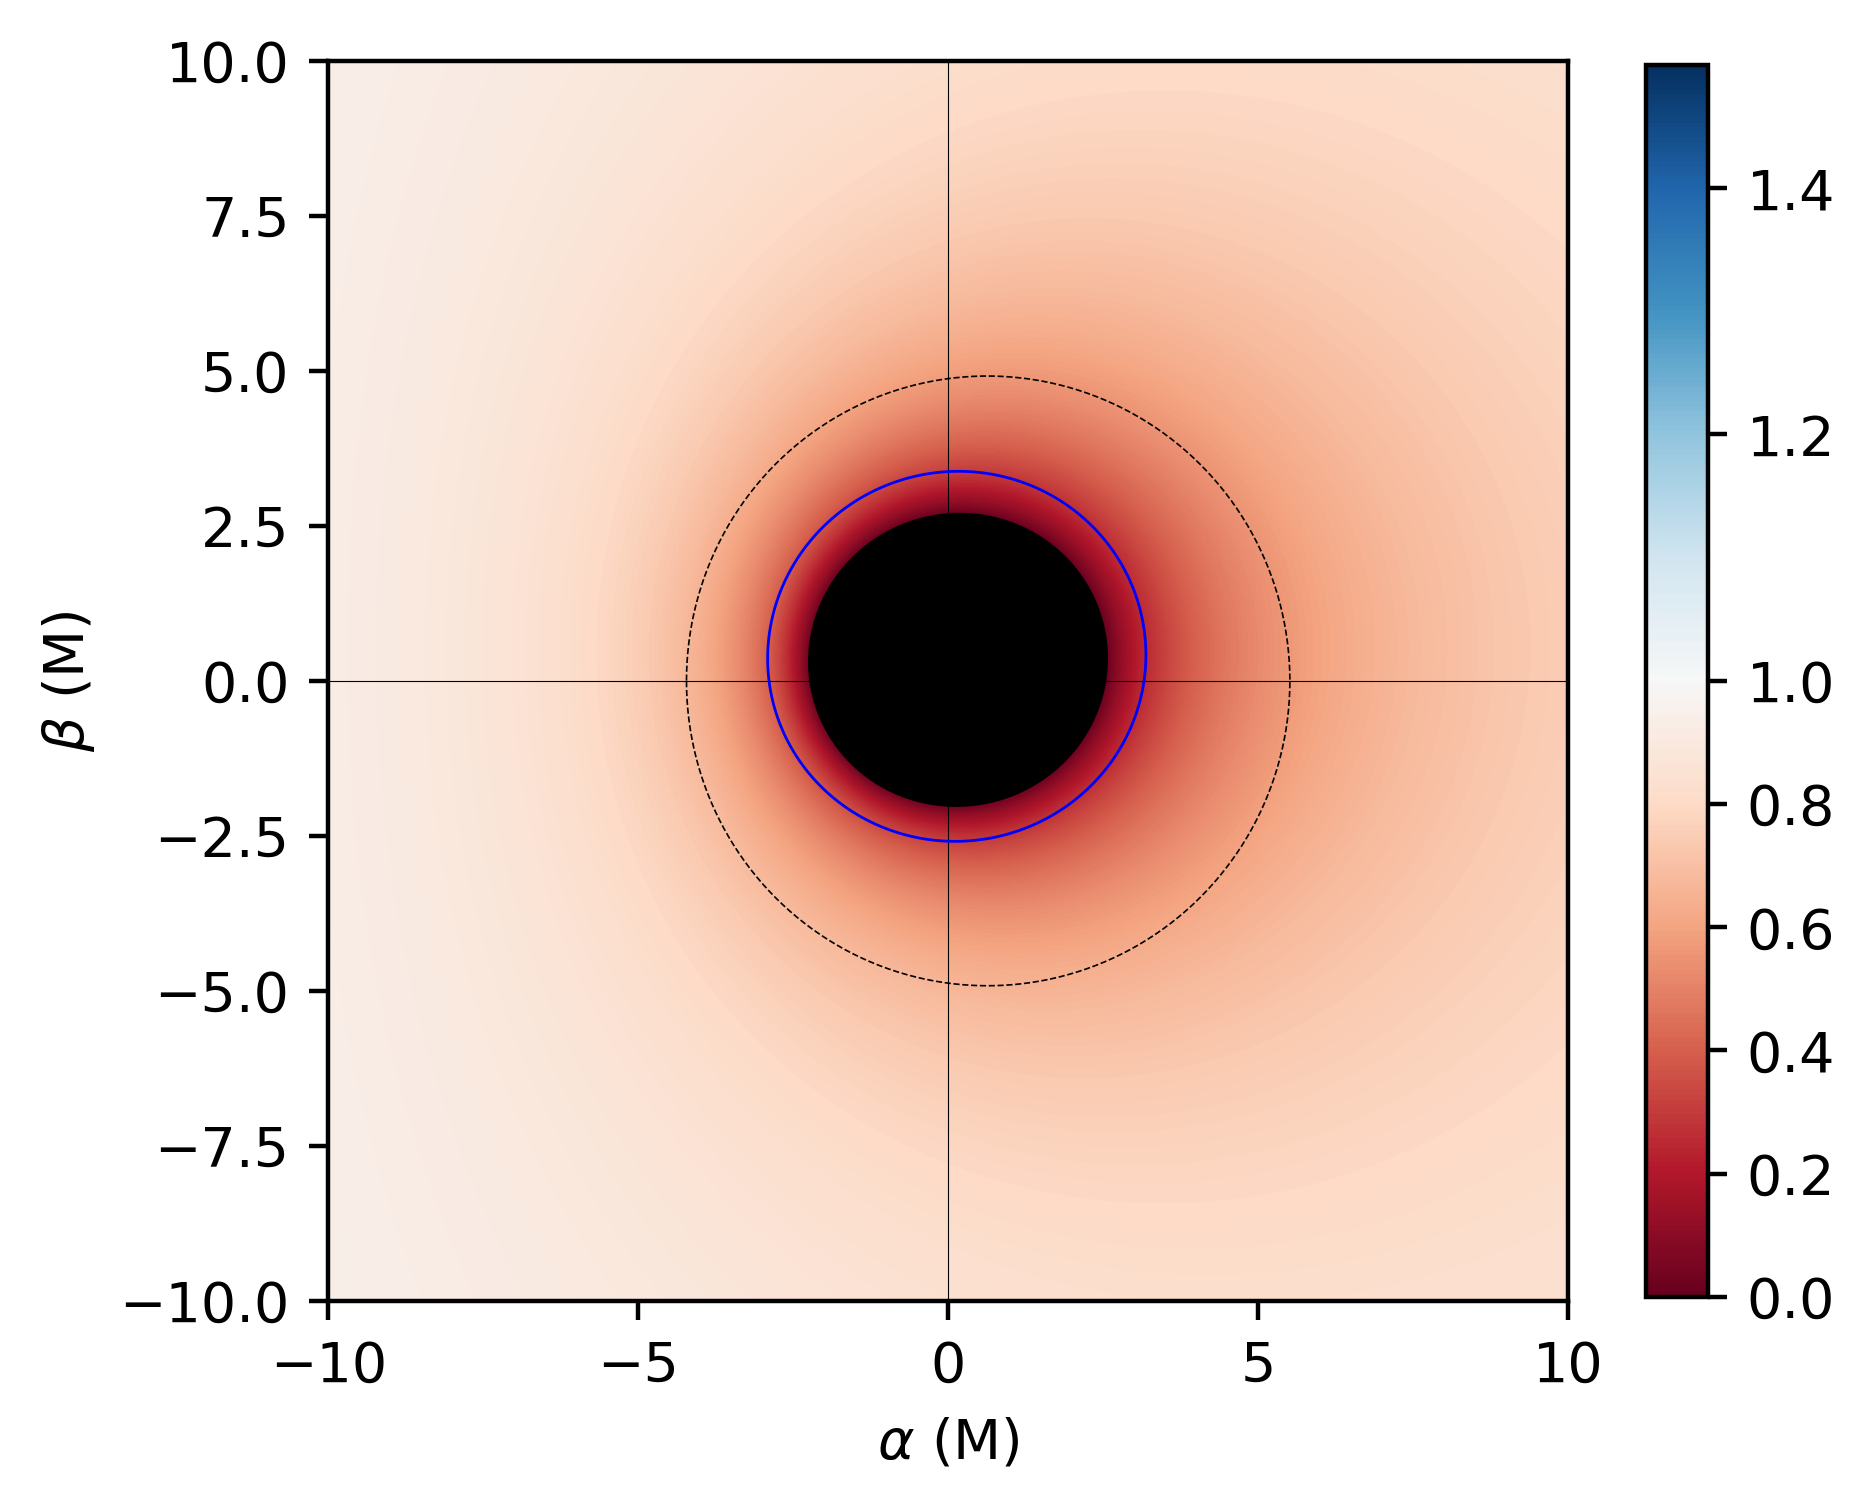

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")

CSg=ax.imshow(gs0,extent=[-lim0,lim0,-lim0,lim0],origin="lower",cmap="RdBu",norm=divnorm)

CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[radius],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='blue')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

plt.colorbar(CSg,shrink=0.8)

plt.show()

plt.savefig('Redshift.png',dpi=400,bbox_inches='tight')

We select some (!) of the points of that contour. This number is something one may want to change. 

In [14]:
nPointCont=400

xs_HR=[]
ys_HR=[]
for i in range(len(CSr.allsegs[0])):
    v=CSr.collections[0].get_paths()[i].vertices
    for j in range(len(v[:,0])):
        xs_HR.append(v[:,0][j])
        ys_HR.append(v[:,1][j])
    
xs_HR=np.array(xs_HR)[::int(CSr.allsegs[0][0].shape[0]/nPointCont)]
ys_HR=np.array(ys_HR)[::int(CSr.allsegs[0][0].shape[0]/nPointCont)]
radiuscoords=np.array([xs_HR,ys_HR]).T

In [15]:
redshifts = griddata(supergrid0, gs0.reshape(N0*N0), radiuscoords, method='linear')

In [16]:
maxredshift=np.max(redshifts)

As a sanity check, we plot everything together.

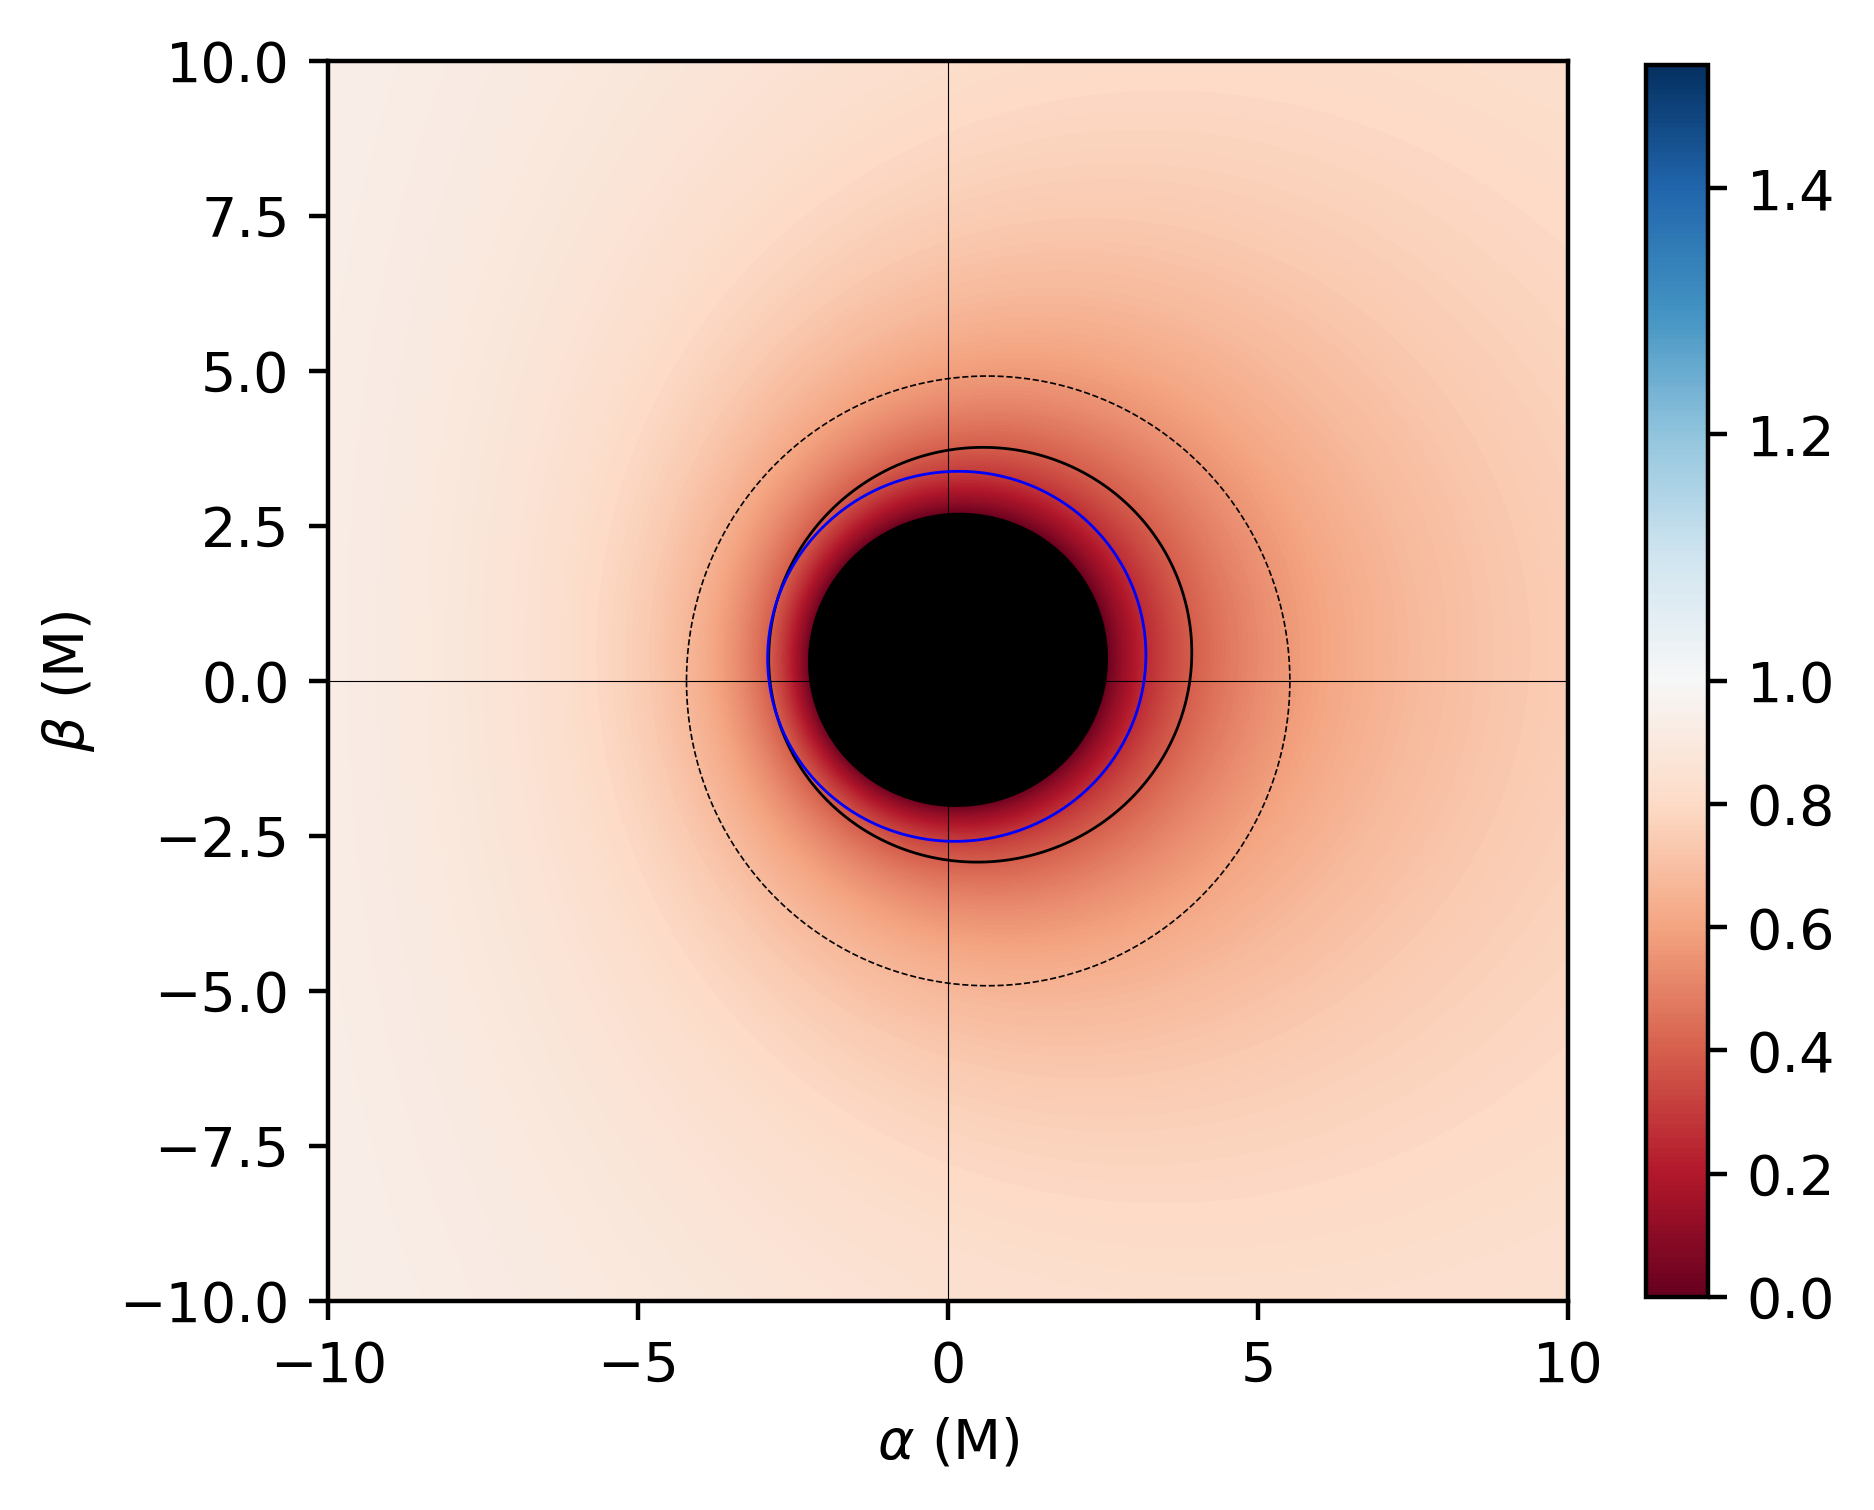

In [17]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")

CSg=ax.imshow(gs0,extent=[-lim0,lim0,-lim0,lim0],origin="lower",cmap="RdBu",norm=divnorm)

CSgc=ax.contour(gs0,levels=[maxredshift],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='black')

CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[radius],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='blue')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

plt.colorbar(CSg,shrink=0.8)

plt.show()

# Visualizing results 

I put this in case we did not run the above lines and arrive here from running MOBRadius.py

In [19]:
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations
from matplotlib import colors

In [20]:
divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=1., vmax=1.5)

In [21]:
aig=np.load("aig.npy")

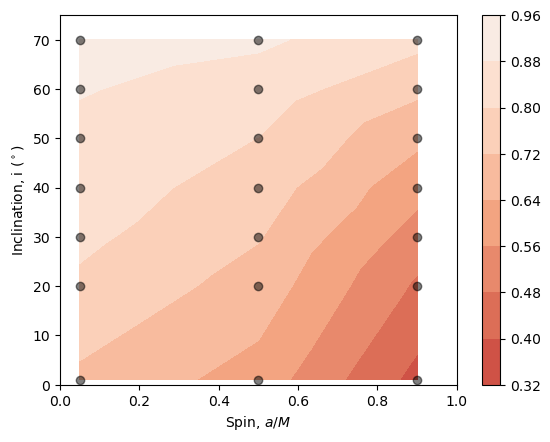

In [22]:
plt.tricontourf(aig[:,0],aig[:,1],aig[:,2],cmap="RdBu",norm=divnorm)
plt.colorbar()

plt.scatter(aig[:,0],aig[:,1],marker="o",color="black",alpha=0.5)

plt.xlim(0,1)
plt.ylim(0,75)

plt.xlabel("Spin, "+r"$a/M$")
plt.ylabel("Inclination, i "+r"$(^\circ)$")

plt.savefig('RedshiftValsRadius.png',dpi=400,bbox_inches='tight')

## License

MIT license

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software 
without restriction, including without limitation the rights to use, copy, modify, merge, 
publish, distribute, sublicense, and/or sell copies of the Software, and to permit 
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR 
PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE 
FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, 
ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN 
THE SOFTWARE.